Check vertices quality distribution

# Import

In [1]:
import sys, os, yaml
from glob import glob
sys.path.append('../lib')

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import ROOT as rt
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)
from progressBar import ProgressBar
from histo_utilities import create_TH1D, create_TH2D, SetMaxToMaxHist
from analysis_utilities import drawOnCMSCanvas

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Internal"

In [3]:
import signal

class TimeoutError(Exception):
    pass

class timeout:
    def __init__(self, seconds=1, error_message='Timeout'):
        self.seconds = seconds
        self.error_message = error_message
    def handle_timeout(self, signum, frame):
        raise TimeoutError(self.error_message)
    def __enter__(self):
        signal.signal(signal.SIGALRM, self.handle_timeout)
        signal.alarm(self.seconds)
    def __exit__(self, type, value, traceback):
        signal.alarm(0)

In [4]:
# load FWLite C++ libraries
rt.gSystem.Load("libFWCoreFWLite.so");
rt.gSystem.Load("libDataFormatsFWLite.so");
rt.FWLiteEnabler.enable()

# load FWlite python libraries
from DataFormats.FWLite import Events
from DataFormats.FWLite import Handle

In [5]:
site_loc_conf = '/mnt/hadoop/store/user/ocerri'
sampleFile = '/storage/user/ocerri/work/CMSSW_10_2_3/src/ntuplizer/BPH_RDntuplizer/production/samples.yml'
samples = yaml.load(open(sampleFile))['samples']

In [7]:
handle = {}
handle['vertexes'] = [Handle('std::vector<reco::Vertex>'), 'offlineSlimmedPrimaryVertices']

Fetch information

In [11]:
sample = 'B0_MuNuDmst_PU0'
MINIAOD_dirs = []
for part in samples[sample]['parts']:
        aux = glob(part)
        if len(aux) > 0:
            aux = os.path.dirname(part)
        else:
            aux = glob(site_loc_conf + part[:-38].replace('ocerri-','') + '/*/*')
        MINIAOD_dirs += aux
print len(MINIAOD_dirs)

N_max = 50
fileList = []
for directory in MINIAOD_dirs:
    fileList += glob(directory + '/out_MINIAODSIM_*.root')
if N_max > 0 and N_max < len(fileList):
    fileList = np.random.choice(fileList, N_max)
    
pv = []
allv = []

print 'Analizing', len(fileList), 'MINIAOD'
pb = ProgressBar(maxEntry=len(fileList))
skippedFiles = []
for i_j, fileName in enumerate(fileList):
    pb.show(i_j)

    with timeout(seconds=3):
        try:
            for event in Events(fileName):
                prods = {}
                for k,v in handle.iteritems():
                    event.getByLabel(v[1], v[0])
                    prods[k] = v[0].product()
                for i, v in enumerate(prods['vertexes']):
                    if i == 0:
                        pv.append([v.normalizedChi2(), v.nTracks()])
                    else:
                        allv.append([v.normalizedChi2(), v.nTracks()])
                
        except:
            skippedFiles.append(fileName)
print 'Skipped {} files'.format(len(skippedFiles))

pvMC0 = np.array(pv)
allvMC0 = np.array(allv)

6
Analizing 50 MINIAOD
[####################]  100% - Tot. time: 50.7 s
Skipped 0 files


In [8]:
sample = 'B0_MuNuDmst_PU20'
MINIAOD_dirs = []
for part in samples[sample]['parts']:
        aux = glob(part)
        if len(aux) > 0:
            aux = os.path.dirname(part)
        else:
            aux = glob(site_loc_conf + part[:-38].replace('ocerri-','') + '/*/*')
        MINIAOD_dirs += aux
print len(MINIAOD_dirs)

N_max = 50
fileList = []
for directory in MINIAOD_dirs:
    fileList += glob(directory + '/out_MINIAODSIM_*.root')
if N_max > 0 and N_max < len(fileList):
    fileList = np.random.choice(fileList, N_max)
    
pv = []
allv = []

print 'Analizing', len(fileList), 'MINIAOD'
pb = ProgressBar(maxEntry=len(fileList))
skippedFiles = []
for i_j, fileName in enumerate(fileList):
    pb.show(i_j)

    with timeout(seconds=3):
        try:
            for event in Events(fileName):
                prods = {}
                for k,v in handle.iteritems():
                    event.getByLabel(v[1], v[0])
                    prods[k] = v[0].product()
                for i, v in enumerate(prods['vertexes']):
                    if i == 0:
                        pv.append([v.normalizedChi2(), v.nTracks()])
                    else:
                        allv.append([v.normalizedChi2(), v.nTracks()])
                
        except:
            skippedFiles.append(fileName)
print 'Skipped {} files'.format(len(skippedFiles))

pvMC = np.array(pv)
allvMC = np.array(allv)

Analizing 50 MINIAOD
[####################]  100% - Tot. time: 67.0 s
Skipped 4 files


# Data

In [9]:
sample = '/storage/user/ocerri/work/CMSSW_10_2_3/src/ntuplizer/BPH_RDntuplizer/production/inputFiles_ParkingBPH1_Run2018D-05May2019promptD-v1_MINIAOD.txt'
f = open(sample, 'r')
N_max = 1
fileList = []
for l in f.readlines():
    fileList.append(l[:-1])
    if N_max > 0 and N_max == len(fileList):
        break

print fileList
    
pv = []
allv = []

print 'Analizing', len(fileList), 'MINIAOD'
for i_j, fileName in enumerate(fileList):
    pb = ProgressBar(maxEntry=10000)
    for ie, event in enumerate(Events('root://cmsxrootd.fnal.gov/'+fileName)):
        pb.show(ie)
        prods = {}
        for k,v in handle.iteritems():
            event.getByLabel(v[1], v[0])
            prods[k] = v[0].product()
        for i, v in enumerate(prods['vertexes']):
            if i == 0:
                pv.append([v.normalizedChi2(), v.nTracks()])
            else:
                allv.append([v.normalizedChi2(), v.nTracks()])
        if ie == 9999:
            break


pvRD = np.array(pv)
allvRD = np.array(allv)

['/store/data/Run2018D/ParkingBPH1/MINIAOD/05May2019promptD-v1/270000/4682963C-2EFF-FF4D-B234-8ED5973F70E4.root']
Analizing 1 MINIAOD
[####################]  100% - Tot. time: 8.2 s


In [12]:
def setHistoColorMarker(h, color, marker=None):
    h.SetLineColor(color)
    h.SetMarkerColor(color)
    if not marker is None:
        h.SetMarkerStyle(marker)

<ROOT.TLine object ("TLine") at 0x12acd4c0>

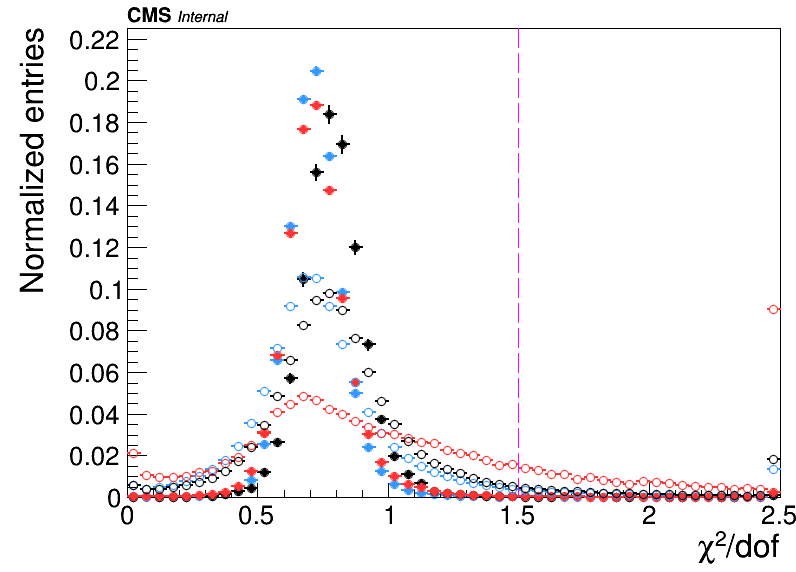

In [24]:
hPVMC = create_TH1D(pvMC[:,0], title='hPVRD',
                 binning=[50, 0, 2.5],
                 axis_title=['#chi^{2}/dof', 'Normalized entries'],
                 scale_histo=1./pvMC.shape[0],
                 opt='overflow'
                )
setHistoColorMarker(hPVMC, rt.kAzure+1, 8)

hPVRD = create_TH1D(pvRD[:,0], title='hPVRD', binning=hPVMC.binning, scale_histo=1./pvRD.shape[0], opt='overflow')
setHistoColorMarker(hPVRD, 1, 8)

hPVMC0 = create_TH1D(pvMC0[:,0], title='hPVMC0', binning=hPVMC.binning, scale_histo=1./pvMC0.shape[0], opt='overflow')
setHistoColorMarker(hPVMC0, rt.kRed-4, 8)

hallMC = create_TH1D(allvMC[:,0], title='hallvtxMC', binning=hPVMC.binning, scale_histo=1./allvMC.shape[0], opt='overflow')
setHistoColorMarker(hallMC, rt.kAzure+1, 4)

hallMC0 = create_TH1D(allvMC0[:,0], title='hallvtxMC', binning=hPVMC.binning, scale_histo=1./allvMC0.shape[0], opt='overflow')
setHistoColorMarker(hallMC0, rt.kRed-4, 4)

hallRD = create_TH1D(allvRD[:,0], title='hallvtxMC', binning=hPVMC.binning, scale_histo=1./allvRD.shape[0], opt='overflow')
setHistoColorMarker(hallRD, 1, 4)

hl = [hPVMC, hPVRD, hPVMC0, hallMC, hallMC0, hallRD]
m = SetMaxToMaxHist(hl)
c = drawOnCMSCanvas(CMS_lumi, hl, 'same')
l = rt.TLine()
l.SetLineColor(6)
l.SetLineStyle(9)
# l.DrawLine(0., 0, 0, m)
l.DrawLine(1.5, 0, 1.5, m)

<ROOT.TLine object ("TLine") at 0x142a8f40>

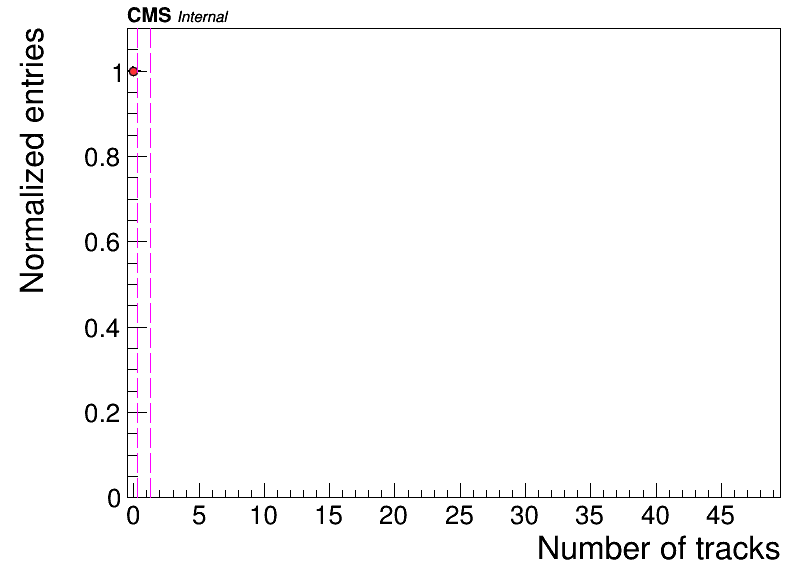

In [22]:
hPVMC = create_TH1D(pvMC[:,1], title='hPVRD',
                 binning=[50, -0.5, 49.5],
                 axis_title=['Number of tracks', 'Normalized entries'],
                 scale_histo=1./pvMC.shape[0],
                 opt='overflow'
                )
setHistoColorMarker(hPVMC, rt.kAzure+1, 8)

hPVRD = create_TH1D(pvRD[:,1], title='hPVRD', binning=hPVMC.binning, scale_histo=1./pvRD.shape[0], opt='overflow')
setHistoColorMarker(hPVRD, 1, 8)

hPVMC0 = create_TH1D(pvMC0[:,1], title='hPVMC0', binning=hPVMC.binning, scale_histo=1./pvMC0.shape[0], opt='overflow')
setHistoColorMarker(hPVMC0, rt.kRed-4, 8)

hallMC = create_TH1D(allvMC[:,1], title='hallvtxMC', binning=hPVMC.binning, scale_histo=1./allvMC.shape[0], opt='overflow')
setHistoColorMarker(hallMC, rt.kAzure+1, 4)

hallMC0 = create_TH1D(allvMC0[:,1], title='hallvtxMC', binning=hPVMC.binning, scale_histo=1./allvMC0.shape[0], opt='overflow')
setHistoColorMarker(hallMC0, rt.kRed-4, 4)

hallRD = create_TH1D(allvRD[:,1], title='hallvtxMC', binning=hPVMC.binning, scale_histo=1./allvRD.shape[0], opt='overflow')
setHistoColorMarker(hallRD, 1, 4)

hl = [hPVMC, hPVRD, hPVMC0, hallMC, hallMC0, hallRD]
m = SetMaxToMaxHist(hl)
c = drawOnCMSCanvas(CMS_lumi, hl, 'same')
l = rt.TLine()
l.SetLineColor(6)
l.SetLineStyle(9)
l.DrawLine(0.3, 0, 0.3, m)
l.DrawLine(1.3, 0, 1.3, m)